In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


In [3]:
file_path = r'C:\Users\guest123\Desktop\Nikhil\Portfolio\IBM_HR_Attrition_Rate\WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
missing_values = df.isnull().sum()
print(missing_values)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

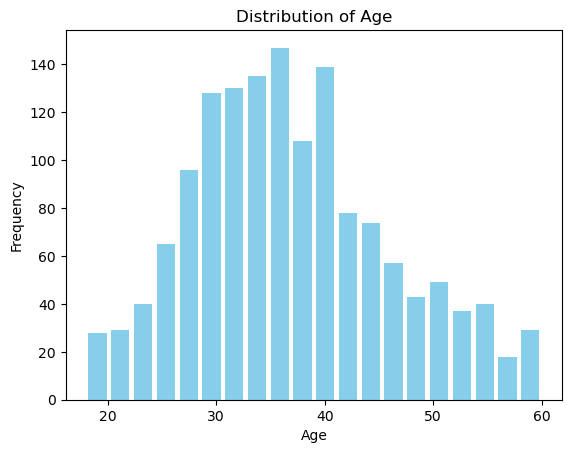

In [17]:
# Histogram for Age
plt.hist(df['Age'], bins=20, color='skyblue', rwidth=0.8)  # Adjust the rwidth value as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


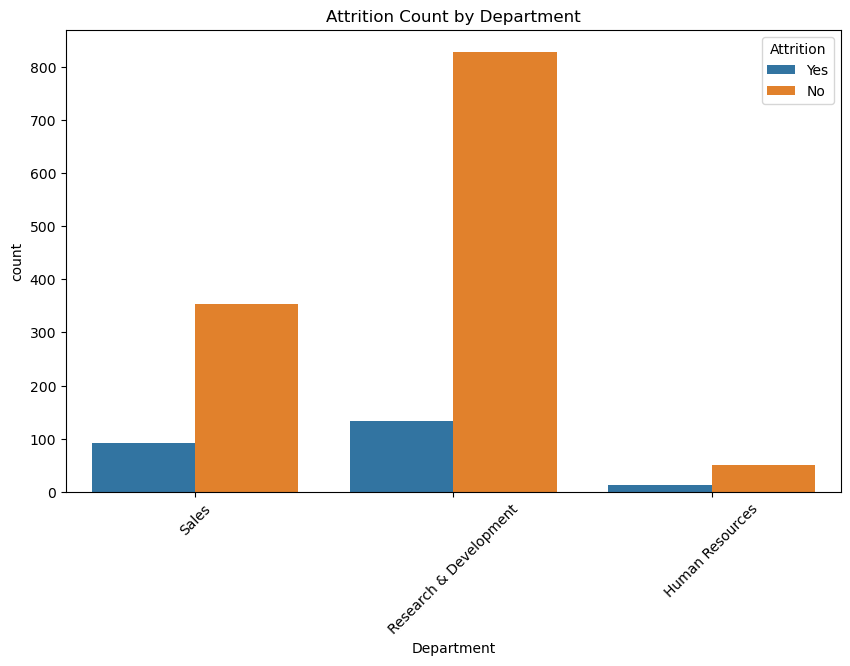

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Attrition')
plt.xticks(rotation=45)
plt.title('Attrition Count by Department')
plt.show()

In [69]:
#New DF after removing fields that are not required for the model ( since it does not impact)
columns_to_drop = ['BusinessTravel', 'EmployeeCount', 'EmployeeNumber', 'StandardHours']

model_df=df.drop(columns=columns_to_drop)

# One-HOt Encoding for categorical variables
encoded_df = pd.get_dummies(model_df, columns=['JobRole', 'MaritalStatus', 'OverTime', 'Department','EducationField','Gender','Over18'], drop_first=True)

In [70]:
print(encoded_df)

      Age Attrition  DailyRate  DistanceFromHome  Education  \
0      41       Yes       1102                 1          2   
1      49        No        279                 8          1   
2      37       Yes       1373                 2          2   
3      33        No       1392                 3          4   
4      27        No        591                 2          1   
...   ...       ...        ...               ...        ...   
1465   36        No        884                23          2   
1466   39        No        613                 6          1   
1467   27        No        155                 4          3   
1468   49        No       1023                 2          3   
1469   34        No        628                 8          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                           2          94               3         2   
1                           3          61               2         2   
2                           4 

In [71]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = encoded_df.drop('Attrition', axis=1)
y = encoded_df['Attrition']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=10000)

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [73]:
# Generate predictions on the testing set
predictions = model.predict(X_test)

# Evaluate model performance (example: using accuracy)
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8843537414965986


In [74]:
# Generate classification report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

          No       0.90      0.97      0.94       255
         Yes       0.62      0.33      0.43        39

    accuracy                           0.88       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.87      0.88      0.87       294



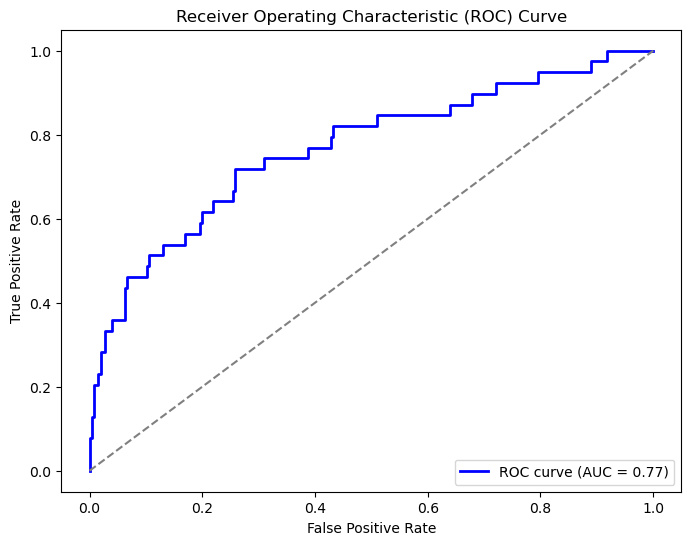

In [75]:
# Assuming you have already trained your logistic regression model and have predictions

from sklearn.metrics import roc_curve, auc

# Assuming 'model' is your trained Logistic Regression model
y_scores = model.predict_proba(X_test)[:, 1]

# Encoding 'Yes' as 1 and 'No' as 0 in the target variable y_test
y_test_binary = y_test.replace({'Yes': 1, 'No': 0})

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)

# Calculate the Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [76]:
# Train a RandomForestClassifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
# Get feature importances
importances = model.feature_importances_

# Create a Series with feature importances indexed by feature names
feature_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

# Display sorted feature importance
print(feature_imp)


MonthlyIncome                        0.076742
OverTime_Yes                         0.064737
Age                                  0.058042
TotalWorkingYears                    0.057151
DailyRate                            0.051725
MonthlyRate                          0.049997
HourlyRate                           0.046238
DistanceFromHome                     0.043981
YearsAtCompany                       0.043078
NumCompaniesWorked                   0.035797
PercentSalaryHike                    0.033265
StockOptionLevel                     0.032931
YearsInCurrentRole                   0.031613
YearsWithCurrManager                 0.029339
JobSatisfaction                      0.027442
TrainingTimesLastYear                0.026665
EnvironmentSatisfaction              0.026061
YearsSinceLastPromotion              0.025756
JobLevel                             0.023172
RelationshipSatisfaction             0.022381
WorkLifeBalance                      0.022099
MaritalStatus_Single              

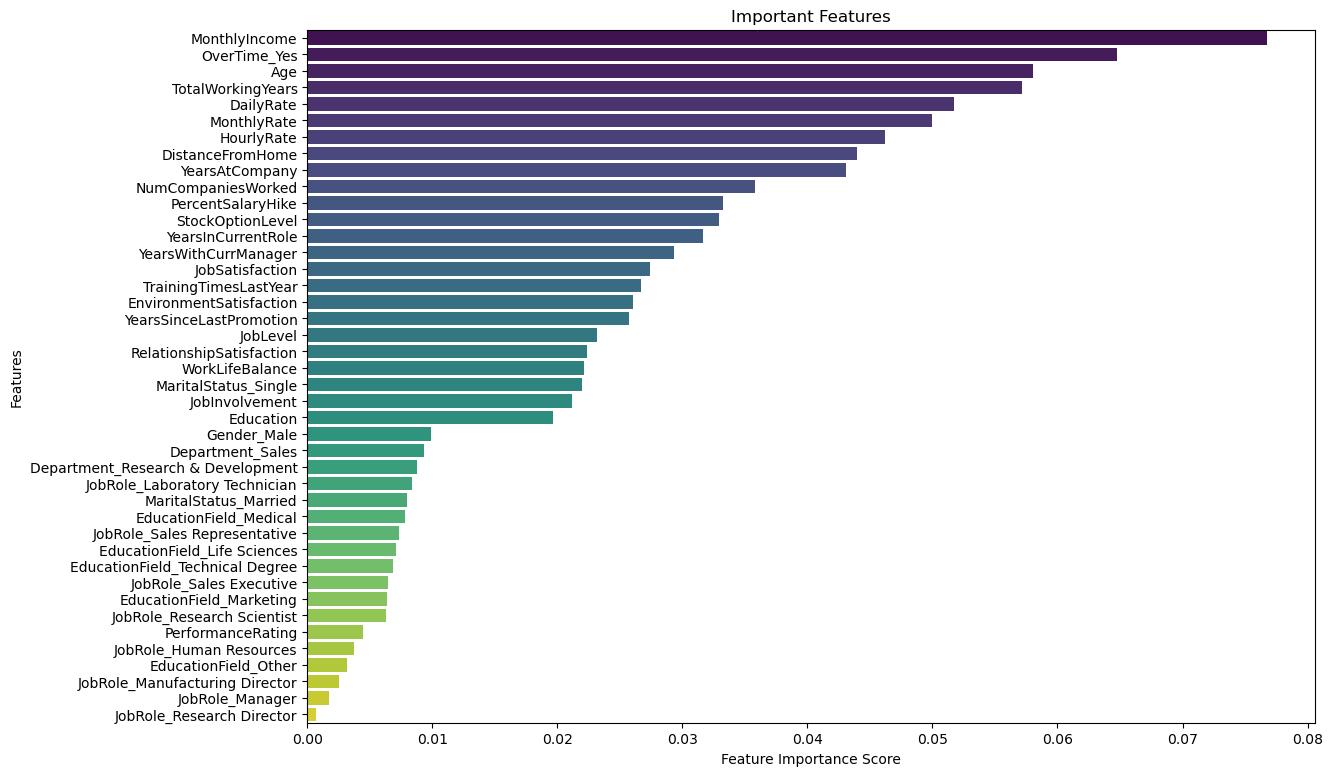

In [78]:
# Creating a bar plot
plt.figure(figsize=(13, 9))
sns.barplot(x=feature_imp.values, y=feature_imp.index, palette="viridis")

# Adding labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")

# Displaying the plot
plt.show()